<a href="https://colab.research.google.com/github/NiteeshSingh/DPHI_DeepLearningBootcamp_WeatherClassification/blob/main/DPhi_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![dphi banner](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/dphi_banner.png)

## Loading Libraries
All Python capabilities are not loaded to our working environment by default (even they are already installed in your system). So, we import each and every library that we want to use.

We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd, tensorlow --> tf).

Note: You can import all the libraries that you think will be required or can import it as you go along.

In [ ]:
import pandas as pd                                     # Data analysis and manipultion tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf      
import random                           # Deep Learning Tool
import os              
import time
from IPython.display import display                                 # OS module in Python provides a way of using operating system dependent functionality
import cv2                                              # Library for image processing
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set
import matplotlib.pyplot as plt
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

In [ ]:
tf.random.set_seed(1)
random.seed(1)
np.random.seed(1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# set ansi color values
Cblu ='\33[34m'
Cend='\33[0m'   # sets color back to default 
Cred='\033[91m'
Cblk='\33[39m'
Cgreen='\33[32m'
Cyellow='\33[33m'

## Loading and preparing training data
The train and test images are given in two different folders - 'train' and 'test'. The labels of train images are given in a csv file 'Train.csv' with respective image id (i.e. image file name).

#### Getting the labels of the images

In [ ]:
labels = pd.read_csv("/content/drive/MyDrive/Dphi-Analytics Club/DataThon/Training_set.csv")   # loading the labels
labels.head()           # will display the first five rows in labels dataframe

,filename,label
0,Image_1.jpg,sunrise
1,Image_2.jpg,shine
2,Image_3.jpg,cloudy
3,Image_4.jpg,shine
4,Image_5.jpg,sunrise


In [ ]:
labels.tail()            # will display the last five rows in labels dataframe

,filename,label
1043,Image_1044.jpg,foggy
1044,Image_1045.jpg,sunrise
1045,Image_1046.jpg,cloudy
1046,Image_1047.jpg,rainy
1047,Image_1048.jpg,sunrise


#### Getting images file path

In [ ]:
file_paths = [[fname, '/content/drive/MyDrive/Dphi-Analytics Club/DataThon/train/' + fname] for fname in labels['filename']]

In [ ]:
file_paths[:5]

[['Image_1.jpg',
  '/content/drive/MyDrive/Dphi-Analytics Club/DataThon/train/Image_1.jpg'],
 ['Image_2.jpg',
  '/content/drive/MyDrive/Dphi-Analytics Club/DataThon/train/Image_2.jpg'],
 ['Image_3.jpg',
  '/content/drive/MyDrive/Dphi-Analytics Club/DataThon/train/Image_3.jpg'],
 ['Image_4.jpg',
  '/content/drive/MyDrive/Dphi-Analytics Club/DataThon/train/Image_4.jpg'],
 ['Image_5.jpg',
  '/content/drive/MyDrive/Dphi-Analytics Club/DataThon/train/Image_5.jpg']]

#### Confirming if no. of labels is equal to no. of images

In [ ]:
# Confirm if number of images is same as number of labels given
if len(labels) == len(file_paths):
    print('Number of labels i.e. ', len(labels), 'matches the number of filenames i.e. ', len(file_paths))
else:
    print('Number of labels does not match the number of filenames')

Number of labels i.e.  1048 matches the number of filenames i.e.  1048


#### Converting the file_paths to dataframe

In [ ]:
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
images.head()

,filename,filepaths
0,Image_1.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...
1,Image_2.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...
2,Image_3.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...
3,Image_4.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...
4,Image_5.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...


#### Combining the labels with the images

In [ ]:
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')
train_data.head()       

,filename,filepaths,label
0,Image_1.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...,sunrise
1,Image_2.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...,shine
2,Image_3.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...,cloudy
3,Image_4.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...,shine
4,Image_5.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...,sunrise


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['label'] = le.fit_transform(train_data['label'])

In [ ]:
encodings = dict(zip(le.transform(le.classes_), le.classes_))
encodings

{0: 'cloudy', 1: 'foggy', 2: 'rainy', 3: 'shine', 4: 'sunrise'}

The 'train_data' dataframe contains all the image id, their locations and their respective labels. Now the training data is ready.

## Data Pre-processing
It is necessary to bring all the images in the same shape and size, also convert them to their pixel values because all machine learning or deep learning models accepts only the numerical data. Also we need to convert all the labels from categorical to numerical values.

In [ ]:
data = []    # initialize an empty numpy array
shapes = []
image_size = 224      # image size taken is 100 here. one can take other size too
for i in range(len(train_data)):
  
  img_array = cv2.imread(train_data['filepaths'][i])   
  shapes.append(img_array.shape)
  new_img_array = cv2.resize(img_array, (image_size, image_size))      # resizing the image array
  data.append([new_img_array[...,::-1], train_data['label'][i]])

In [ ]:
# from collections import defaultdict
# width = defaultdict(int)
# height = defaultdict(int)

# # iterating over the list
# for item in shapes:
#    width[item[0]] += 1
#    height[item[1]] += 1

# # printing the frequency
# width = dict(sorted(width.items(), key=lambda item: item[0]))
# height = dict(sorted(height.items(), key=lambda item: item[1]))
# height

In [ ]:
data = np.array(data)
np.shape(data), np.shape(data[0]), np.shape(data[0][0]), np.shape(data[0][1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


((1048, 2), (2,), (224, 224, 3), ())

####Augumentation

In [ ]:
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=5,  # rotation
                                                          width_shift_range=0.2,  # horizontal shift
                                                          zoom_range=0.2,  # zoom
                                                          horizontal_flip=True,  # horizontal flip
                                                          brightness_range=[0.2,0.8],  # brightness
                                                          fill_mode='nearest'
                                                          )

In [ ]:
aug_iter = datagen.flow(np.expand_dims(data[0][0], axis=0), batch_size=1)

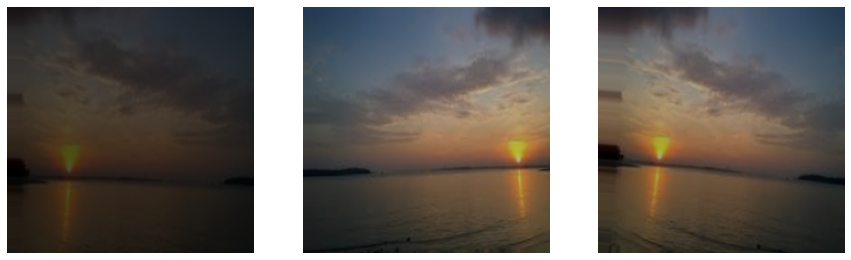

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for a in ax:

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')
 
	# plot image
	a.imshow(image)
	a.axis('off')

#### Shuffle the data

In [ ]:
np.random.shuffle(data)

#### Separating the images and labels


In [ ]:
x = []
y = []
for image in data:
  x.append(image[0])
  y.append(image[1])

# converting x & y to numpy array as they are list
x = np.array(x)
y = np.array(y)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4]), array([210, 210, 209, 174, 245]))

#### info about shape and size

In [ ]:
x.shape, y.shape

((1048, 224, 224, 3), (1048,))

#### plotting the images

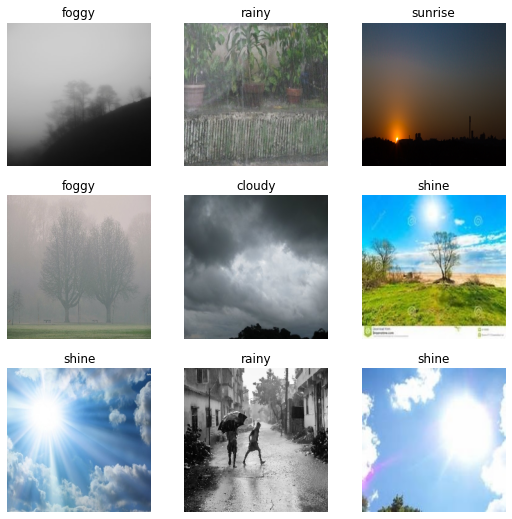

In [ ]:
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x[i])
    plt.title(f"{encodings[y[i]]}")
    plt.axis('off')

#### Splitting the data into Train and Validation Set
We want to check the performance of the model that we built. For this purpose, we always split (both independent and dependent data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.

In [ ]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((838, 224, 224, 3), (838,), (210, 224, 224, 3), (210,))

## Building Model
Now we are finally ready, and we can train the model.

There are many machine learning or deep learning models like Random Forest, Decision Tree, Multi-Layer Perceptron (MLP), Convolution Neural Network (CNN), etc. to say you some.


Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [ ]:
EPOCHS = 30
BATCH_SIZE = 50

In [ ]:
def train_models(models, names):
  n = len(models)
  history = [0]*n
  for i in range(n):
    display(models[i].summary())
    models[i].compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history[i] = models[i].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    print(f"CNN {names[i]}: Epochs={EPOCHS}, Train accuracy={max(history[i].history['accuracy'])}, Validation accuracy={max(history[i].history['val_accuracy'])}")
  return history

In [ ]:
def plot_accuracies(historys, names):
  plt.figure(figsize=(15,5))
  n = len(historys)
  for i in range(n):
      plt.plot(historys[i].history['val_accuracy'], linestyle=styles[i])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(names, loc='upper left')
  axes = plt.gca()
  plt.show()

#### number of layers

In [ ]:
nets = 3
models = [0]*3
names = ['3', '4', '5']

In [ ]:
models[0] = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    # tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',),
    tf.keras.layers.Dense(5, activation='softmax')
])

models[1] = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    # tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',),
    tf.keras.layers.Dense(5, activation='softmax')
])

models[2] = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    # tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
histories = train_models(models, names)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 100, 100, 128)     9728      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 50, 50, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 50, 50, 256)       819456    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 25, 25, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 25, 25, 512)       3277312   
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 12, 12, 512)     

None

CNN 3: Epochs=30, Train accuracy=1.0, Validation accuracy=0.8285714387893677
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 100, 100, 128)     9728      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 50, 50, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 50, 50, 256)       819456    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 25, 25, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 25, 25, 256)       1638656   
                                           

None

CNN 4: Epochs=30, Train accuracy=0.9931787252426147, Validation accuracy=0.8603174686431885
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 100, 100, 128)     9728      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 50, 50, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 50, 50, 256)       819456    
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 25, 25, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 25, 25, 256)       1638656   
                            

None

CNN 5: Epochs=30, Train accuracy=0.9563437700271606, Validation accuracy=0.841269850730896


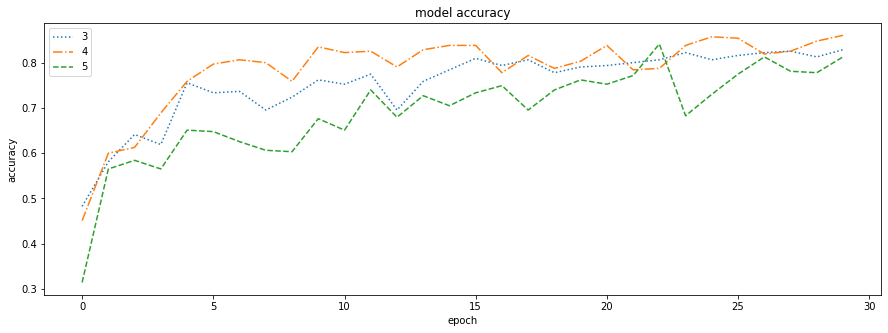

In [ ]:
plot_accuracies(histories, names)

so it seems that 4 conv layer is best suited here

#### Number of Feature maps


lets try number of feture maps as given below in our 4 layer model



*   128, 128, 256, 256, -D 128, 5
*   128, 256, 512, 512, -D 128, 5
*   256, 256, 512, 512, -D 128, 5

In [ ]:
nets = 3
models = [0]*3
names = ['128, 128, 256, 256', '128, 256, 512, 512', '256, 256, 512, 512,']

In [ ]:
models[0] = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    # tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',),
    tf.keras.layers.Dense(5, activation='softmax')
])


models[1] = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    # tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',),
    tf.keras.layers.Dense(5, activation='softmax')
])


models[2] = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',),
    tf.keras.layers.Dense(5, activation='softmax')
])


In [ ]:
histories = train_models(models, names)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 128)       409728    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 256)       819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 256)      0

None

CNN 128, 128, 256, 256: Epochs=30, Train accuracy=0.9522510170936584, Validation accuracy=0.8126984238624573
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 128)     9728      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 256)       819456    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 256)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 512)       3277312   
           

None

CNN 128, 256, 512, 512: Epochs=30, Train accuracy=0.9809004068374634, Validation accuracy=0.8317460417747498
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 100, 256)     19456     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 256)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 256)       1638656   
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 25, 256)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 25, 25, 512)       3277312   
           

None

CNN 256, 256, 512, 512,: Epochs=30, Train accuracy=0.9590722918510437, Validation accuracy=0.803174614906311


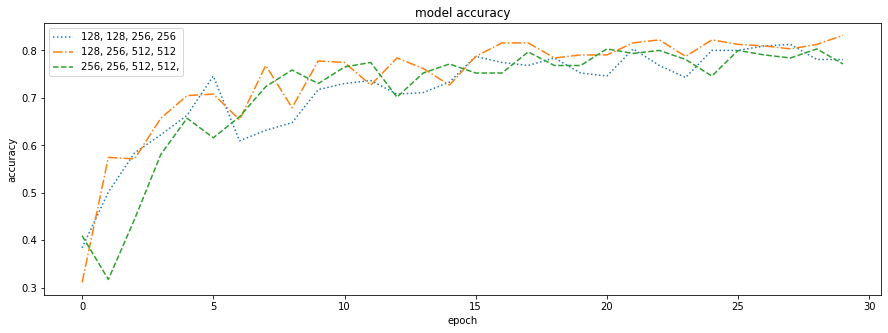

In [ ]:
plot_accuracies(histories, names)

the model with 128, 256, 512, 512 feature maps seems suitable from graph

#### Dense layer architecture

our model so far --

  4 conv layers with 256, 256, 512, 512 feature map and 128, 5 nodel dense layers


lets try some different architect for dense layer-

*   128, 5
*   256, 5
*   512, 5
*   128, 256, 5
*   256, 512, 5
*   256, 128, 5
*   512, 256, 5

In [ ]:
nets = 6
models = [0]*nets
names = ['256', '512', '128-256', '256-512', '256-128', '512-256']

In [ ]:
architecture = [(256,), (512,), (128, 256), (256, 512), (256, 128), (512, 256)]
for i in range(nets):
  models[i] = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten()
  ])

  if len(architecture[i])==1:
    models[i].add(tf.keras.layers.Dense(architecture[i][0], activation='relu'))
    models[i].add(tf.keras.layers.Dense(5, activation='softmax'))
  
  if len(architecture[i])==2:
    models[i].add(tf.keras.layers.Dense(architecture[i][0], activation='relu'))
    models[i].add(tf.keras.layers.Dense(architecture[i][0], activation='relu'))
    models[i].add(tf.keras.layers.Dense(5, activation='softmax'))

In [ ]:
histories = train_models(models, names)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 100, 100, 128)     9728      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 50, 50, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 50, 50, 256)       819456    
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 25, 25, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 25, 25, 512)       3277312   
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 12, 12, 512)    

None

CNN 256: Epochs=30, Train accuracy=0.9631651043891907, Validation accuracy=0.7746031880378723
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 100, 100, 128)     9728      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 50, 50, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 50, 50, 256)       819456    
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 25, 25, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 25, 25, 512)       3277312   
                         

None

CNN 512: Epochs=30, Train accuracy=0.9713506102561951, Validation accuracy=0.8190476298332214
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 100, 100, 128)     9728      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 50, 50, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 50, 50, 256)       819456    
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 25, 25, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 25, 25, 512)       3277312   
                         

None

CNN 128-256: Epochs=30, Train accuracy=0.9945429563522339, Validation accuracy=0.8063492178916931
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 100, 100, 128)     9728      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 50, 50, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 50, 50, 256)       819456    
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 25, 25, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 25, 25, 512)       3277312   
                     

None

CNN 256-512: Epochs=30, Train accuracy=0.9822646379470825, Validation accuracy=0.8380952477455139
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 100, 100, 128)     9728      
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 50, 50, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 50, 50, 256)       819456    
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 25, 25, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 25, 25, 512)       3277312   
                     

None

CNN 256-128: Epochs=30, Train accuracy=0.965893566608429, Validation accuracy=0.8190476298332214
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 100, 100, 128)     9728      
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 50, 50, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 50, 50, 256)       819456    
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 25, 25, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 25, 25, 512)       3277312   
                      

None

CNN 512-256: Epochs=30, Train accuracy=1.0, Validation accuracy=0.8222222328186035


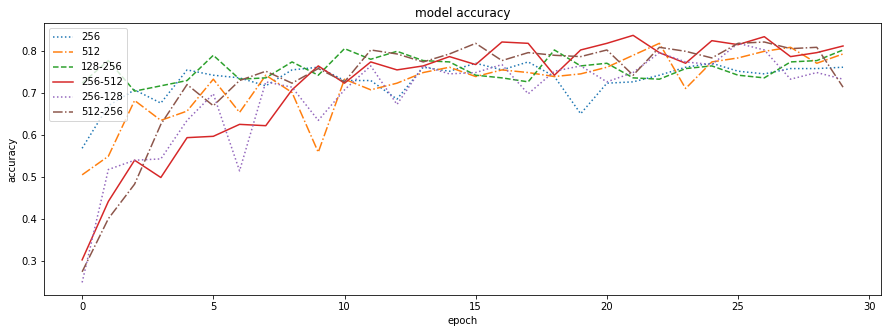

In [ ]:
plot_accuracies(histories, names)

128, 256, 5 seems good dense layer architecture

####Dropout

*** our model so far - *** 

4 layer of convo2d layer with #features as 256, 256, 512, 512

and 2 dense layer with nodes 256, 512


---


***Lets try some of dropout to reduce overfiting and generalisation***



*   dropuout = 0.2
*   dropuout = 0.3
*   dropuout = 0.4
*   dropuout = 0.5
*   dropuout = 0.6


In [ ]:
nets = 5
models = [0]*nets
names = ['D=0.2', 'D=0.3', 'D=0.4', 'D=0.5', 'D=0.6']

In [ ]:
for i in range(nets):
  models[i] = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2+i*0.1),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2+i*0.1),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2+i*0.1),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2+i*0.1),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu',),
    tf.keras.layers.Dense(512, activation='relu',),
    tf.keras.layers.Dense(5, activation='softmax')
  ])

In [ ]:
histories = train_models(models, names)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 100, 100, 256)     19456     
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 50, 50, 256)      0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 50, 50, 256)       0         
                                                                 
 conv2d_72 (Conv2D)          (None, 50, 50, 256)       1638656   
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 25, 25, 256)      0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 25, 25, 256)     

None

CNN D=0.2: Epochs=30, Train accuracy=0.8854024410247803, Validation accuracy=0.7809523940086365
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 100, 100, 256)     19456     
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 50, 50, 256)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 50, 50, 256)       0         
                                                                 
 conv2d_76 (Conv2D)          (None, 50, 50, 256)       1638656   
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 25, 25, 256)      0         
 g2D)                                                            
                       

None

CNN D=0.3: Epochs=30, Train accuracy=0.8390177488327026, Validation accuracy=0.7460317611694336
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 100, 100, 256)     19456     
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 50, 50, 256)      0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 50, 50, 256)       0         
                                                                 
 conv2d_80 (Conv2D)          (None, 50, 50, 256)       1638656   
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 25, 25, 256)      0         
 g2D)                                                            
                       

None

CNN D=0.4: Epochs=30, Train accuracy=0.8008185625076294, Validation accuracy=0.7682539820671082
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_83 (Conv2D)          (None, 100, 100, 256)     19456     
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 50, 50, 256)      0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 50, 50, 256)       0         
                                                                 
 conv2d_84 (Conv2D)          (None, 50, 50, 256)       1638656   
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 25, 25, 256)      0         
 g2D)                                                            
                       

None

CNN D=0.5: Epochs=30, Train accuracy=0.362892210483551, Validation accuracy=0.22539682686328888
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 100, 100, 256)     19456     
                                                                 
 max_pooling2d_87 (MaxPoolin  (None, 50, 50, 256)      0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 50, 50, 256)       0         
                                                                 
 conv2d_88 (Conv2D)          (None, 50, 50, 256)       1638656   
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 25, 25, 256)      0         
 g2D)                                                            
                       

None

CNN D=0.6: Epochs=30, Train accuracy=0.7366985082626343, Validation accuracy=0.5174603462219238


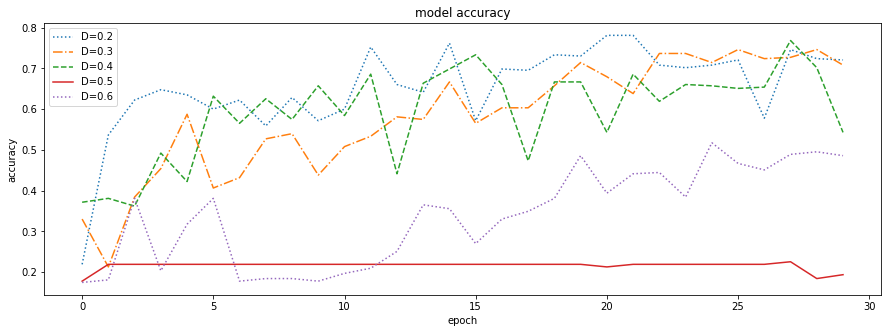

In [ ]:
plot_accuracies(histories, names)

we will use dropout of 0.0

##MOdels

##Final Model


128, 256, 512, 512 - conv layers

512, 256, 5 or 128, 256, 5 - dense layers 

Final Changes



* making 5,5 kernel to into 2 kernels of 3, 3  
* reducing maxpool layer
<!-- * converting maxpool layer to kernel 5, and stride 2 layers -->
* adding batch normalization and l2 regularizer



In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(5, activation='softmax') 
    ], name = "Final_Model")

model.summary()

Model: "Final_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 128)    512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100, 100, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 256)       819456    
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 256)      

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(100, 100, 3)),
#     tf.keras.layers.BatchNormalization(),
#     # tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(100, 100, 3)),
#     # tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='valid', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(100, 100, 3)),
#     tf.keras.layers.BatchNormalization(),
#     # tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(100, 100, 3)),
#     # tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='valid', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.2),


#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l2'),
#     #tf.keras.layers.Dense(512, activation='relu', kernel_regularizer='l2'),
#     tf.keras.layers.Dense(5, activation='softmax')
#   ])

# model.name="Final Model"
# model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
filepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
#annealer = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, mode='min', verbose=1, patience=5)

In [ ]:
model.load_weights('my_best_model.epoch03-loss2552.52.hdf5')

In [ ]:
X_train.shape, X_val.shape

((733, 100, 100, 3), (315, 100, 100, 3))

In [ ]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=50,
                    shuffle=True)
                    #callbacks=[checkpoint, es])

Epoch 1/50
17/17 [==============================] - 5s 295ms/step - loss: 2.2557 - accuracy: 0.9403 - val_loss: 4.4055 - val_accuracy: 0.5905
Epoch 2/50
17/17 [==============================] - 2s 138ms/step - loss: 2.0222 - accuracy: 0.9487 - val_loss: 4.0221 - val_accuracy: 0.6524
Epoch 3/50
17/17 [==============================] - 2s 139ms/step - loss: 2.0091 - accuracy: 0.9523 - val_loss: 6.2391 - val_accuracy: 0.4429
Epoch 4/50
17/17 [==============================] - 2s 139ms/step - loss: 2.0652 - accuracy: 0.9308 - val_loss: 5.0082 - val_accuracy: 0.5238
Epoch 5/50
17/17 [==============================] - 2s 139ms/step - loss: 2.4345 - accuracy: 0.9081 - val_loss: 3.9120 - val_accuracy: 0.6714
Epoch 6/50
17/17 [==============================] - 2s 139ms/step - loss: 2.9225 - accuracy: 0.9093 - val_loss: 3.5188 - val_accuracy: 0.7667
Epoch 7/50
17/17 [==============================] - 2s 140ms/step - loss: 2.8098 - accuracy: 0.9212 - val_loss: 4.7782 - val_accuracy: 0.6524
Epoch 

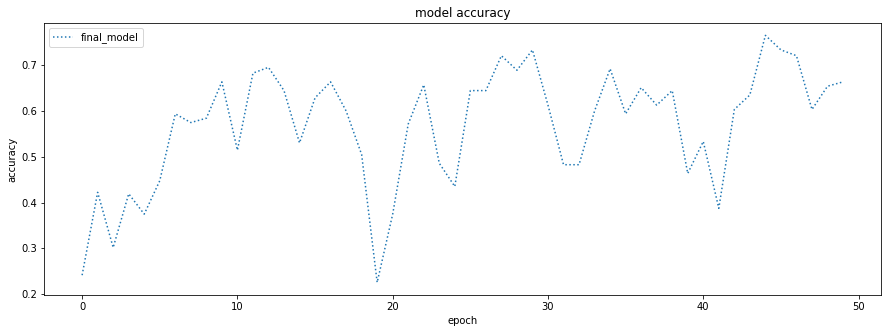

In [ ]:
plot_accuracies([history], ["final_model"])

##MobileNet

In [ ]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)
base_model.trainable = False
base_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [ ]:
#base_model.trainable = True
# l = len(base_model.layers)
# for i in range(l):
#   if i<l-3:
#     base_model.layers[i].trainable=False
#   else:
#     base_model.layers[i].trainable=True
# print(len(base_model.layers))
# base_model.
# base_model.pop()
# base_model.pop()
# print(len(base_model.layers))
# base_model.layers[-2:]

In [ ]:
model = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.Dense(128, activation='relu', kernel_regularizer='l2'),
  tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 25
batch_size = 32
train_steps = int(np.ceil(838/batch_size))
epochs =40
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.7 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.5 # factor to reduce lr by
dwell=True # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=False # if true free weights of  the base model
ask_epoch=5 # number of epochs to run before asking if you want to halt training
batches=train_steps

In [ ]:
callbacks=[LRA(model=model,base_model= base_model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, batches=batches,initial_epoch=0,epochs=epochs, ask_epoch=ask_epoch )]

In [ ]:
history = model.fit(datagen.flow(X_train, y_train,
                                       batch_size=batch_size,
                                       seed=27,
                                       shuffle=True),
                    validation_data=(X_val, y_val),
                    epochs=epochs,
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    shuffle=True,
                    verbose=0,
                    callbacks=callbacks)

initializing callback starting training with base_model not trainable

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration

 1 /40     0.667   74.566   0.80906  69.048   0.00100  0.00100  accuracy     0.00     9.57  

 2 /40     0.623   78.040   0.75151  71.905   0.00100  0.00100  accuracy     4.66     9.58  

 3 /40     0.586   81.017   0.75347  70.476   0.00100  0.00100  accuracy     3.82     9.69  

 4 /40     0.577   78.164   0.71943  73.810   0.00100  0.00050  accuracy    -3.52     9.59  

 5 /40     0.592   78.288   0.72149  75.714   0.00050  0.00025  accuracy    -3.37     9.72  

enter H to halt ,F to fine tune model, or an integer for number of epochs to run then ask again

3
 training will continue until epoch 8

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration

 6 /40     0.578   80.273   0.72756  74.286   0.00025  0.00013  accuracy    -0.92     9.77  

 training has been halted at epoch 6 afte

##Another Model

In [ ]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    # tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 128)     9728      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 256)     819456    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 56, 256)       1638656   
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 28, 28, 256)     

In [ ]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

####Callbacks

In [ ]:
class tr(tf.keras.callbacks.Callback):
    best_weights=model.get_weights()
    best_acc=0
    patience=10
    p_count=0
    focus='acc'
    def __init__(self):
        super(tr, self).__init__()
        self.best_acc = 0
        self.patience=10
        self.p_count=0
    def on_batch_end(self, batch, logs=None): 
        epoch=logs.get('epoch')
        acc=logs.get('accuracy')
        if tr.best_acc>.9:
            if tr.focus=='acc':
                msg='{0}\n with training accuracy= {1:7.4f} will now start adjusting learning rate based on validation loss\n{2}'
                print(msg.format(Cblu, tr.best_acc, Cend))
                tr.focus='val'
        else:
            if tr.best_acc<acc:
                #accuracy at batch end is better then highest accuracy thus far
                #msg='\non batch {0} accuracy improved from {1:7.4f}  to {2:7.4f} \n'
               # print(msg.format(batch + 1, tr.best_acc, acc ))
                tr.best_acc=acc
                tr.p_count=0
                tr.best_weights=model.get_weights()
           
            else:
                #accuracy on current batch was below highest accuracy thus far
                tr.p_count=tr.p_count + 1
                #msg='\n for batch {0} current accuracy {1:7.4f}  was below highest accuracy of {2:7.4f} for {3} batches'
                #print(msg.format(batch + 1, acc, tr.best_acc,tr.p_count))
                if tr.p_count >= tr.patience:
                    tr.p_count=0
                    lr=float(tf.keras.backend.get_value(self.model.optimizer.lr))
                    new_lr=lr*.95
                    tf.keras.backend.set_value(self.model.optimizer.lr, new_lr) 
                    print('\n adjusted learning rate for batch {0} to {1}\n'.format(batch + 1, new_lr))
                    
class val(tf.keras.callbacks.Callback):
    best_loss=np.inf
    best_weights=tr.best_weights
    lr=float(tf.keras.backend.get_value(model.optimizer.lr))
    def __init__(self):
        super(val, self).__init__()
        self.best_loss=np.inf
        self.best_weights=tr.best_weights
        self.lr=float(tf.keras.backend.get_value(model.optimizer.lr))
    def on_epoch_end(self, epoch, logs=None):            
        v_loss=logs.get('val_loss')
        v_acc=logs.get('val_accuracy')
        
        if v_loss<val.best_loss:
            msg='{0}\nfor epoch {1} validation loss improved,saving weights with validation loss= {2:7.4f}\n{3}'
            print(msg.format(Cgreen,epoch + 1, v_loss, Cend))
            val.best_loss=v_loss
            val.best_weights=model.get_weights()
        else:
            if tr.focus=='val':
                    #validation loss did not improve at end of current epoch
                    lr=float(tf.keras.backend.get_value(self.model.optimizer.lr))
                    new_lr=lr * .7
                    tf.keras.backend.set_value(model.optimizer.lr, new_lr)
                    msg='{0}\n for epoch {1} current loss {2:7.4f} exceeds best boss of {3:7.4f} reducing lr to {4:11.9f}{5}'
                    print(msg.format(Cyellow,epoch + 1, v_loss, val.best_loss, new_lr,Cend))
        val.lr=float(tf.keras.backend.get_value(model.optimizer.lr))
callbacks_3=[tr(), val()]

In [ ]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

class LRA(tf.keras.callbacks.Callback):
    def __init__(self,model, base_model, patience,stop_patience, threshold, factor, dwell, batches, initial_epoch,epochs, ask_epoch):
        super(LRA, self).__init__()
        self.model=model
        self.base_model=base_model
        self.patience=patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience=stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold=threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor=factor # factor by which to reduce the learning rate
        self.dwell=dwell
        self.batches=batches # number of training batch to runn per epoch
        self.initial_epoch=initial_epoch
        self.epochs=epochs
        self.ask_epoch=ask_epoch
        self.ask_epoch_initial=ask_epoch # save this value to restore if restarting training
        # callback variables 
        self.count=0 # how many times lr has been reduced without improvement
        self.stop_count=0        
        self.best_epoch=1   # epoch with the lowest loss        
        self.initial_lr=float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initiallearning rate and save it         
        self.highest_tracc=0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss=np.inf # set lowest validation loss to infinity initially
        self.best_weights=self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights=self.model.get_weights()   # save initial weights if they have to get restored 
        
    def on_train_begin(self, logs=None):        
        if self.base_model != None:
            status=base_model.trainable
            if status:
                msg=' initializing callback starting train with base_model trainable'
            else:
                msg='initializing callback starting training with base_model not trainable'
        else:
            msg='initialing callback and starting training'                        
        print_in_color (msg, (244, 252, 3), (55,65,80)) 
        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print_in_color(msg, (244,252,3), (55,65,80)) 
        self.start_time= time.time()
        
    def on_train_end(self, logs=None):
        stop_time=time.time()
        tr_duration= stop_time- self.start_time            
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        self.model.set_weights(self.best_weights) # set the weights of the model to the best weights
        msg=f'Training is completed - model is set with weights from epoch {self.best_epoch} '
        print_in_color(msg, (0,255,0), (55,65,80))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print_in_color(msg, (0,255,0), (55,65,80))   
        
    def on_train_batch_end(self, batch, logs=None):
        acc=logs.get('accuracy')* 100  # get training accuracy 
        loss=logs.get('loss')
        msg='{0:20s}processing batch {1:4s} of {2:5s} accuracy= {3:8.3f}  loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end='') # prints over on the same line to show running batch count        
        
    def on_epoch_begin(self,epoch, logs=None):
        self.now= time.time()
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        later=time.time()
        duration=later-self.now 
        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr=lr
        v_loss=logs.get('val_loss')  # get the validation loss for this epoch
        acc=logs.get('accuracy')  # get training accuracy 
        v_acc=logs.get('val_accuracy')
        loss=logs.get('loss')        
        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor='accuracy'
            if epoch ==0:
                pimprov=0.0
            else:
                pimprov= (acc-self.highest_tracc )*100/self.highest_tracc
            if acc>self.highest_tracc: # training accuracy improved in the epoch                
                self.highest_tracc=acc # set new highest training accuracy
                self.best_weights=self.model.get_weights() # traing accuracy improved so save the weights
                self.count=0 # set count to 0 since training accuracy improved
                self.stop_count=0 # set stop counter to 0
                if v_loss<self.lowest_vloss:
                    self.lowest_vloss=v_loss
                color= (0,255,0)
                self.best_epoch=epoch + 1  # set the value of best epoch for this epoch              
            else: 
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count>=self.patience -1: # lr should be adjusted
                    color=(245, 170, 66)
                    lr= lr* self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count=0 # reset the count to 0
                    self.stop_count=self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count=0 # reset counter
                    if self.dwell:
                        self.model.set_weights(self.best_weights) # return to better point in N space                        
                    else:
                        if v_loss<self.lowest_vloss:
                            self.lowest_vloss=v_loss                                    
                else:
                    self.count=self.count +1 # increment patience counter                    
        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor='val_loss'
            if epoch ==0:
                pimprov=0.0
            else:
                pimprov= (self.lowest_vloss- v_loss )*100/self.lowest_vloss
            if v_loss< self.lowest_vloss: # check if the validation loss improved 
                self.lowest_vloss=v_loss # replace lowest validation loss with new validation loss                
                self.best_weights=self.model.get_weights() # validation loss improved so save the weights
                self.count=0 # reset count since validation loss improved  
                self.stop_count=0  
                color=(0,255,0)                
                self.best_epoch=epoch + 1 # set the value of the best epoch to this epoch
            else: # validation loss did not improve
                if self.count>=self.patience-1: # need to adjust lr
                    color=(245, 170, 66)
                    lr=lr * self.factor # adjust the learning rate                    
                    self.stop_count=self.stop_count + 1 # increment stop counter because lr was adjusted 
                    self.count=0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    if self.dwell:
                        self.model.set_weights(self.best_weights) # return to better point in N space
                else: 
                    self.count =self.count +1 # increment the patience counter                    
                if acc>self.highest_tracc:
                    self.highest_tracc= acc
        msg=f'{str(epoch+1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc*100:^9.3f}{v_loss:^9.5f}{v_acc*100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print_in_color (msg,color, (55,65,80))
        if self.stop_count> self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg=f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print_in_color(msg, (0,255,255), (55,65,80))
            self.model.stop_training = True # stop training
        else: 
            if self.ask_epoch !=None:
                if epoch + 1 >= self.ask_epoch:
                    if base_model.trainable:
                        msg='enter H to halt  or an integer for number of epochs to run then ask again'
                    else:
                        msg='enter H to halt ,F to fine tune model, or an integer for number of epochs to run then ask again'
                    print_in_color(msg, (0,255,255), (55,65,80))
                    ans=input('')
                    if ans=='H' or ans=='h':
                        msg=f'training has been halted at epoch {epoch + 1} due to user input'
                        print_in_color(msg, (0,255,255), (55,65,80))
                        self.model.stop_training = True # stop training
                    elif ans == 'F' or ans=='f':
                        if base_model.trainable:
                            msg='base_model is already set as trainable'
                        else:
                            msg='setting base_model as trainable for fine tuning of model'
                            self.base_model.trainable=True
                        print_in_color(msg, (0, 255,255), (55,65,80))
                        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
                        print_in_color(msg, (244,252,3), (55,65,80))                         
                        self.count=0
                        self.stop_count=0                        
                        self.ask_epoch = epoch + 1 + self.ask_epoch_initial 
                        
                    else:
                        ans=int(ans)
                        self.ask_epoch +=ans
                        msg=f' training will continue until epoch ' + str(self.ask_epoch)                         
                        print_in_color(msg, (0, 255,255), (55,65,80))
                        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
                        print_in_color(msg, (244,252,3), (55,65,80)) 

In [ ]:
batch_size = 32
train_steps = int(np.ceil(838/batch_size))
epochs =40
patience= 2 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =7 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.7 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.4 # factor to reduce lr by
dwell=True # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=False # if true free weights of  the base model
ask_epoch=5 # number of epochs to run before asking if you want to halt training
batches=train_steps

In [ ]:
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=4,
    verbose=1,
    restore_best_weights=True,
)

callbacks_es = [es]

####another mdoel

In [ ]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='valid', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    # tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',),
    tf.keras.layers.Dense(5, activation='softmax')
])
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 220, 220, 128)     9728      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 110, 110, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 106, 106, 256)     819456    
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 53, 53, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 49, 49, 256)       1638656   
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 24, 24, 256)     

In [ ]:
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
callbacks_3=[LRA(model=model_3,base_model=None, patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, batches=batches,initial_epoch=0,epochs=epochs, ask_epoch=ask_epoch )]

In [ ]:
history = model_3.fit(datagen.flow(X_train, y_train,
                                       batch_size=batch_size,
                                       seed=27,
                                       shuffle=True),
                    validation_data=(X_val, y_val),
                    epochs=epochs,
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    shuffle=True,
                    verbose=0,
                    callbacks=callbacks_3)

initialing callback and starting training

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration

 1 /40    111.248  23.821   1.24701  44.286   0.00100  0.00100  accuracy     0.00    12.83  

 2 /40     1.165   51.861   1.01568  56.667   0.00100  0.00100  accuracy    117.71   12.07  

 3 /40     1.064   60.422   0.97822  54.762   0.00100  0.00100  accuracy    16.51    11.97  

 4 /40     0.986   63.151   1.21806  57.143   0.00100  0.00100  accuracy     4.52    12.02  

 5 /40     0.945   69.231   1.86173  51.429   0.00100  0.00100  accuracy     9.63    11.98  



NameError: ignored

####3fit

In [ ]:
history = model_2.fit(datagen.flow(X_train, y_train,
                                       batch_size=batch_size,
                                       seed=27,
                                       shuffle=True),
                    validation_data=(X_val, y_val),
                    epochs=epochs,
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    shuffle=True,
                    verbose=2,
                    callbacks=callbacks_3)

## Sample model

In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = cnn.fit(X_train, y_train, 
                  validation_data=(X_val, y_val), 
                  epochs=20, 
                  batch_size=50,
                  shuffle=True)

NameError: ignored

## Validate the model
Wonder🤔 how well your model learned! Lets check its performance on the X_val data.

In [ ]:
model_2.evaluate(X_val, y_val)

7/7 [==============================] - 1s 103ms/step - loss: 0.7390 - accuracy: 0.8381


[0.7389530539512634, 0.8380952477455139]

## Predict The Output For Testing Dataset 😅
We have trained our model, evaluated it and now finally we will predict the output/target for the testing data (i.e. Test.csv).

#### Load Test Set
Load the test data on which final submission is to be made.

In [ ]:
# Loading the order of the image's name that has been provided
test_image_order = pd.read_csv("/content/drive/MyDrive/Dphi-Analytics Club/DataThon/Testing_set.csv")
test_image_order.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


#### Getting images file path

In [ ]:
file_paths = [[fname, '/content/drive/MyDrive/Dphi-Analytics Club/DataThon/test/' + fname] for fname in test_image_order['filename']]

#### Confirm if number of images in test folder is same as number of image names in 'Testing_set_face_mask.csv'

In [ ]:
# Confirm if number of images is same as number of labels given
if len(test_image_order) == len(file_paths):
    print('Number of image names i.e. ', len(test_image_order), 'matches the number of file paths i.e. ', len(file_paths))
else:
    print('Number of image names does not match the number of filepaths')

Number of image names i.e.  450 matches the number of file paths i.e.  450


#### Converting the file_paths to dataframe

In [ ]:
test_images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
test_images.head()

,filename,filepaths
0,Image_1.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...
1,Image_2.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...
2,Image_3.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...
3,Image_4.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...
4,Image_5.jpg,/content/drive/MyDrive/Dphi-Analytics Club/Dat...


## Data Pre-processing on test_data


In [ ]:
test_pixel_data = []     # initialize an empty numpy array
image_size = 224      # image size taken is 100 here. one can take other size too
for i in range(len(test_images)):
  
  img_array = cv2.imread(test_images['filepaths'][i])   
  new_img_array = cv2.resize(img_array, (image_size, image_size))      # resizing the image array
  test_pixel_data.append([new_img_array[...,::-1]])

In [ ]:
test_pixel_data = np.array(test_pixel_data)

In [ ]:
test_pixel_data =  test_pixel_data.reshape(-1, image_size, image_size, 3)

## Make Prediction on Test Dataset
Time to make a submission!!!

In [ ]:
pred = model_2.predict(test_pixel_data)

In [ ]:
# The predicted values are the probabilities value
pred[0]

array([2.1597857e-06, 4.4570278e-04, 9.9802327e-01, 1.9945078e-04,
       1.3295888e-03], dtype=float32)

The above values are probability values. We need to convert it into respective classes. We can use np.argmax for the same.

In [ ]:
prediction = []
for value in pred:
  prediction.append(np.argmax(value))

In [ ]:
predictions = le.inverse_transform(prediction)

In [ ]:
res = pd.DataFrame({'filename': test_images['filename'], 'label': predictions})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv", index = False) 

# To download the csv file locally
from google.colab import files        
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Well Done! 👍**
You are all set to make a submission. Let's head to the **[challenge page](https://dphi.tech/challenges/data-sprint-41/142/submit)** to make the submission.